In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 100, 
    "ct": 50,
    "dx": 50,
    "dt": 40,
}
config.batch_size = {
    "dirichlet": 2300,
    "collocation": 7000,
}
config.iterations = 10000
config.print_every = 1000

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

/home/chuan/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


2020/09/07, 14:12:20, Iteration: 1000, Train Loss: 1.1859e+00, c1: 2.2306e-01, c2: 6.2687e-02, d1: 1.1324e-02, d2: 7.8686e-02, l1_reg: 6.5520e+02, l2_reg: 1.4266e+02
2020/09/07, 14:13:55, Iteration: 2000, Train Loss: 1.0638e+00, c1: 2.0070e-01, c2: 5.9313e-02, d1: 8.5452e-03, d2: 7.1837e-02, l1_reg: 6.5083e+02, l2_reg: 1.6035e+02
2020/09/07, 14:15:31, Iteration: 3000, Train Loss: 1.0944e+00, c1: 2.3673e-01, c2: 6.7881e-02, d1: 1.0837e-02, d2: 6.8146e-02, l1_reg: 6.3060e+02, l2_reg: 1.7052e+02
2020/09/07, 14:17:07, Iteration: 4000, Train Loss: 8.6860e-01, c1: 1.8446e-01, c2: 4.9024e-02, d1: 1.0433e-02, d2: 5.3078e-02, l1_reg: 6.1163e+02, l2_reg: 1.7706e+02
2020/09/07, 14:18:42, Iteration: 5000, Train Loss: 7.3378e-01, c1: 1.8218e-01, c2: 5.1866e-02, d1: 9.5246e-03, d2: 4.0448e-02, l1_reg: 6.2659e+02, l2_reg: 1.9019e+02
2020/09/07, 14:20:17, Iteration: 6000, Train Loss: 7.1605e-01, c1: 1.8807e-01, c2: 3.8128e-02, d1: 9.2569e-03, d2: 3.9728e-02, l1_reg: 5.9758e+02, l2_reg: 1.9483e+02
2020

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


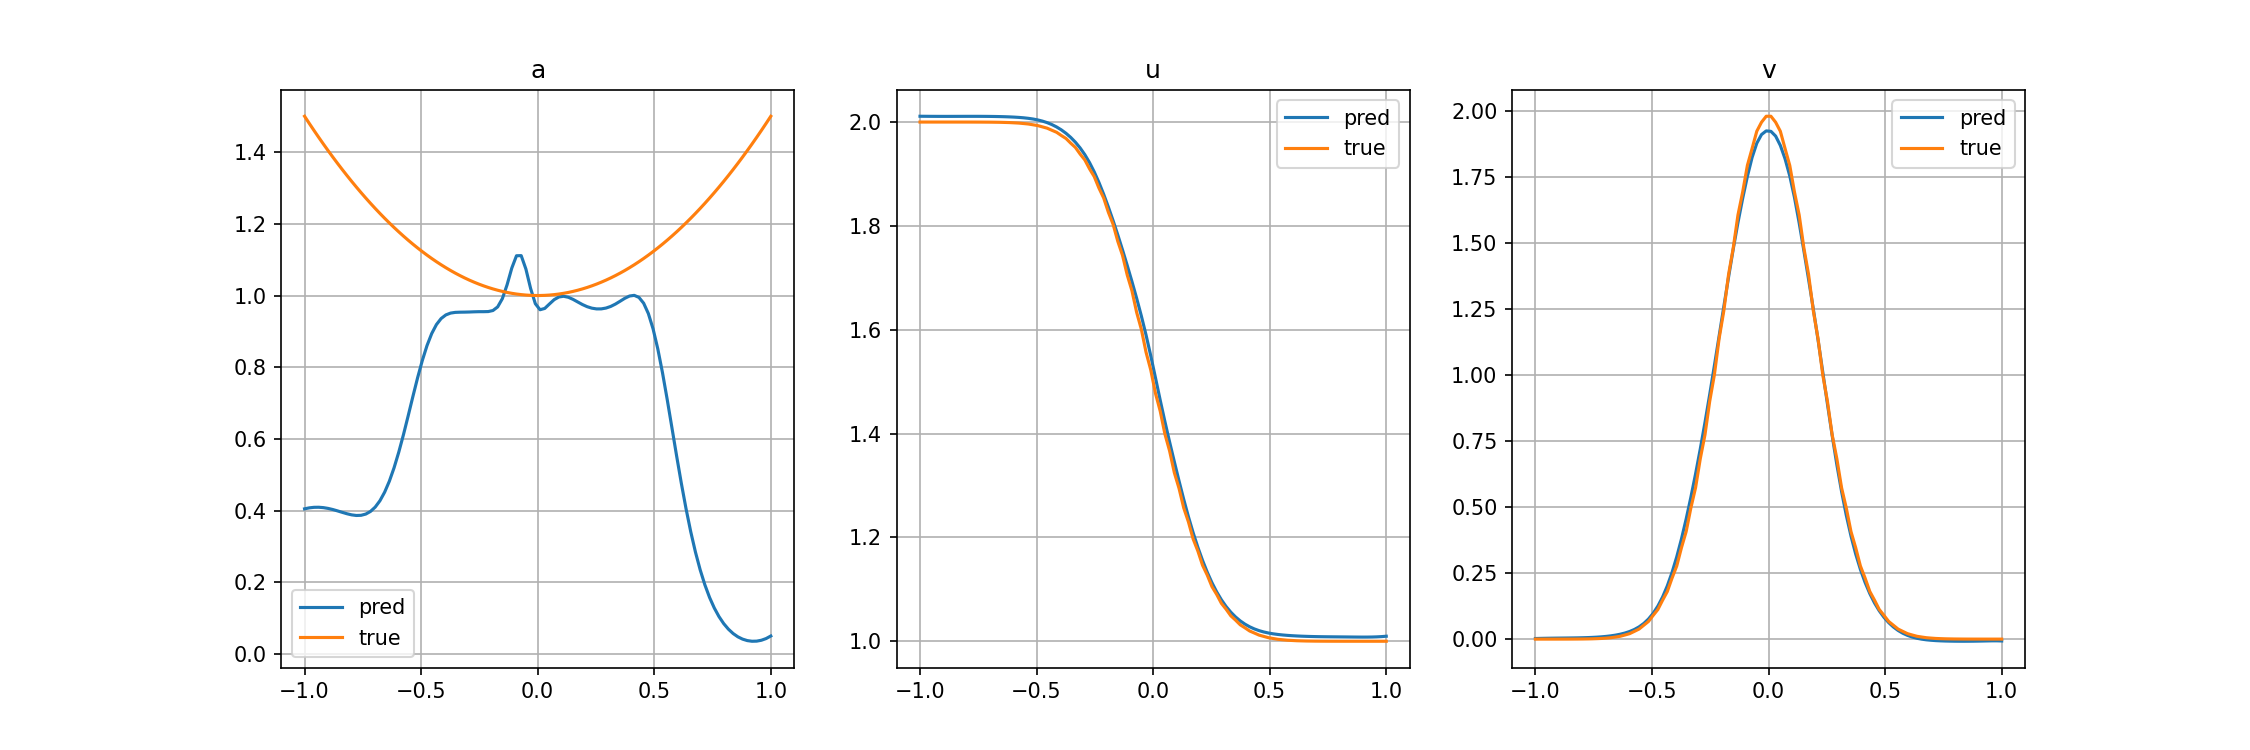

In [2]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+0.5*x**2
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_3_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()